In [171]:
# The contour plots below help you define your investment strategy

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.patches import Ellipse
%matplotlib inline
import numpy as np

# A model for stock return calculation

The purpose of this model is to help us estimate, what size a stock position need to have, to be considered lucrative under standard market conditions (10, 100, 1,000 or 10,000 €)?

### Annotations:
$R$: Return<br>
$I$: Income<br>
$E$: Expenditure<br>
$_b$ or $_s$: buy or sell annotation<br>
$n$: Number of stocks<br>
$p$. Price per stock<br>
$c$: Cost per position transaction (not per stock)<br>
$m$: Total capital available<br>
$r$: Maximum risk per position<br>
$<x>$: Average value of variable x<br>
$\Delta x$: Uncertainty for x

### Definitions

\begin{equation*}
R = I - E \tag{1}
\end{equation*}

- <b>Assumption 1: $c_{b} \approx c_{s} = c $
\begin{equation*}
E = n_b \cdot p_{b} + c = \frac{m r - c}{p_{b}} p_{b} + c = m r \tag{2}
\end{equation*}

- <b>Assumption 2:</b> $p_{s} = (1+x)\cdot p_{b}$
\begin{equation*}
I = n_{b} \cdot p_{s} - c = \frac{m r - c}{p_{b}} p_{s} - c = \frac{m r - c}{p_{b}} (1+x)\cdot p_{b} - c\\ \tag{3}
I = (m r - c)\cdot(1+x) - c = (m r - c)\cdot(1+x) - c\\
\end{equation*}

This yields us the formula for the return:
\begin{equation}
R = (m r - c)\cdot(1+x) - c  - m r = \left[ (m r - c)\cdot x - 2c \right],
\end{equation}

having an uncertainty of

\begin{equation*}
\sigma^2_R = \left[ \Delta x \cdot (m r - c) \right]^2 \tag{4}
\end{equation*}

The ensemble return is given by:<br>
$$<R_{tot}> = \sum_{i=1}^{n} R_{i} = n \cdot \left[ \left( m r - c\right) \cdot <x> - 2c \right], \tag{5}$$

- <b>Assumption 3:</b> Weighting mean by volatility measure $w_i = \frac{1}{\sigma_i^2}$
$$<x> = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i} = \frac{\sum_{i=1}^{n} \frac{x_i}{\sigma_i^2}}{\sum_{i=1}^{n} \frac{1}{\sigma_i^2}} \tag{6}$$

with an uncertainty for the ensemble
\begin{equation*}
<\sigma^2_{R_{tot}}> = \sum_{i=1}^{n} \sigma^2_{R,i} = \left[ (m r - c) \cdot \sqrt{n} \cdot < \Delta x>\right] \tag{7}
\end{equation*}
$$<\Delta x> = \frac{\sum_{i=1}^{n} \frac{\Delta x_i}{\sigma_i^2} }{\sum_{i=1}^{n} \frac{1}{\sigma_i^2}} \tag{7} $$

The risk is defined by (helps us to eliminate n or r in the above formulae):
\begin{equation*}
n = \frac{1}{r} \,\,\, , \,\, r \in{(0.005, 0.05)} \tag{8}
\end{equation*}

In [172]:
risk = 0.05 # maximum risk you are willing to take per position
n_portfolio = 1/risk
capital = 10000 # total amount of money
buy_cost = 15 # transaction costs (buying)
#sell_cost = 15 #  transaction costs (selling)
#buy_price = 15 # stock price at buy
#sell_price = 11 # stock price at t_now > t_buy
total_yield = 0.07
delta_total_yield = 0.01

def roi(capital, risk, cost, total_yield):
    return (capital * risk - cost)*total_yield - 2*cost

def delta_roi(capital, risk, cost, delta_total_yield):
    return (capital * risk - cost) * delta_total_yield

def total_roi(capital, risk, cost, total_yield_avg, n):
    return n * ( (capital * risk - buy_cost)*total_yield_avg - 2*cost)

def total_roi2(capital, cost, total_yield_avg, n):
    return ( (capital - buy_cost*n)*total_yield_avg - 2*cost*n)

def delta_total_roi(capital, risk, cost, delta_total_yield_avg, n):
    return np.abs(np.sqrt(n) * ( (capital * risk - buy_cost
                    )*delta_total_yield_avg ))

In [173]:
# Example values
print('ROI: {:.2f} - Delta ROI: {:.2f}'.format(
    roi(capital, risk, buy_cost, total_yield
       ), delta_roi(capital, risk, buy_cost, delta_total_yield)
))

print('Total ROI: {:.2f} - Delta Total ROI: {:.2f}'.format(
    total_roi(capital, risk, buy_cost, total_yield, n_portfolio
         ), delta_total_roi(capital, risk, buy_cost, 
                            delta_total_yield, n_portfolio)))

ROI: 3.95 - Delta ROI: 4.85
Total ROI: 79.00 - Delta Total ROI: 21.69


# Return over investment / Balance

In [186]:
risks, total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(-0.15, 0.15, 0.001) )

rois = roi(capital, risks, buy_cost, total_yields)

(-0.15, 0.15)

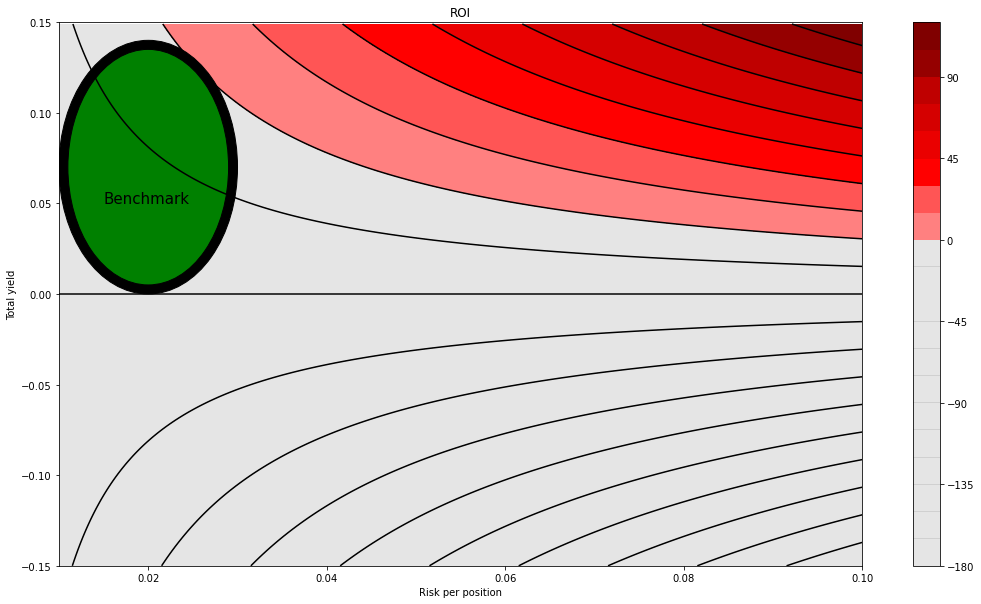

In [188]:
# We find, that the rule-of-thumb to invest up to 0.02 per position given the boundary conditions, 
# does not become profitable, even under exceptionally good market conditions (increase > 7% p.a.)

fig, ax = plt.subplots(figsize=(18, 10))
seismic = cm.get_cmap('seismic', 25)
newcolors = seismic(np.linspace(0, 1, 25))
newcolors[:15, :] = np.array([0.5, .5, .5, 0.2])
newcmp = ListedColormap(newcolors)
cs = ax.contour(risks, total_yields, rois, levels=25, 
                cmap=cm.get_cmap('binary', 1))
cs = ax.contourf(risks, total_yields, rois, levels=25, cmap=newcmp,
                )
ax.add_patch(Ellipse([0.02, 0.07], 0.02, 0.14, edgecolor='k', 
                     facecolor='black', fill=True, alpha=1))
ax.add_patch(Ellipse([0.02, 0.07], 0.018, 0.13, edgecolor='k', 
                     facecolor='green', fill=True, alpha=1))

ax.text(0.015, 0.05, 'Benchmark', fontsize=15)

cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Total yield')
ax.set_title('ROI')
ax.set_xlim([0.01, 0.10])
ax.set_ylim([-0.15, 0.15])

# Delta ROI

In [169]:
risks, delta_total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(0.01, 0.07, 0.001) )

delta_rois = delta_roi(capital, risks, buy_cost, delta_total_yields)

Text(0.5, 1.0, 'Delta ROI')

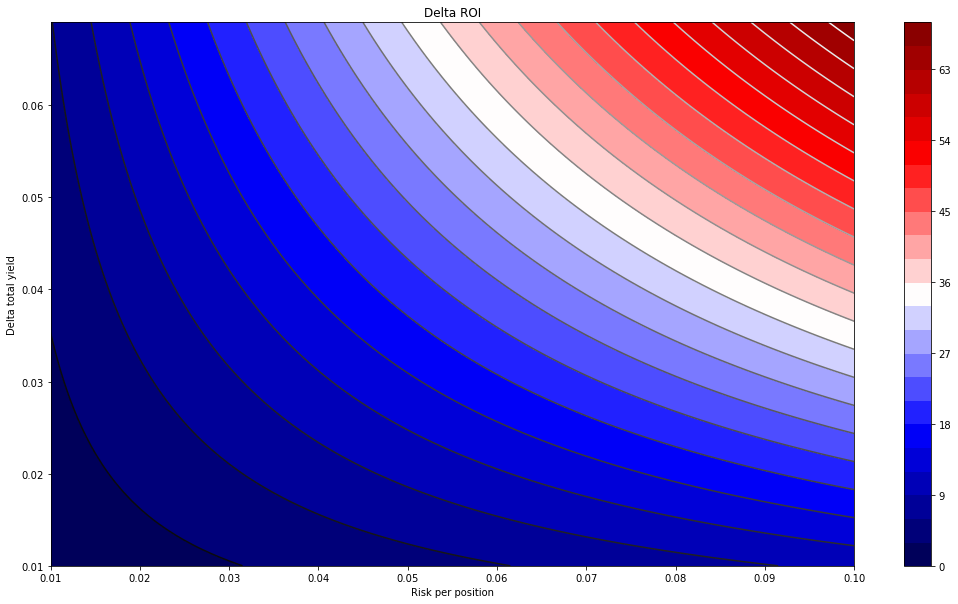

In [170]:
fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(risks, delta_total_yields, delta_rois, 
                levels=25, cmap='gist_gray',
                )
cs = ax.contourf(risks, delta_total_yields, delta_rois, 
                 levels=25, cmap='seismic',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Delta total yield')
ax.set_title('Delta ROI')

# Total ROI

In [181]:
ns, total_yields = np.meshgrid(
                     np.arange(10, 50, 1), 
                     np.arange(0.0, 0.15, 0.01) )

total_rois = total_roi2(capital, buy_cost, total_yields, ns)

Text(0.5, 1.0, 'Total ROIs')

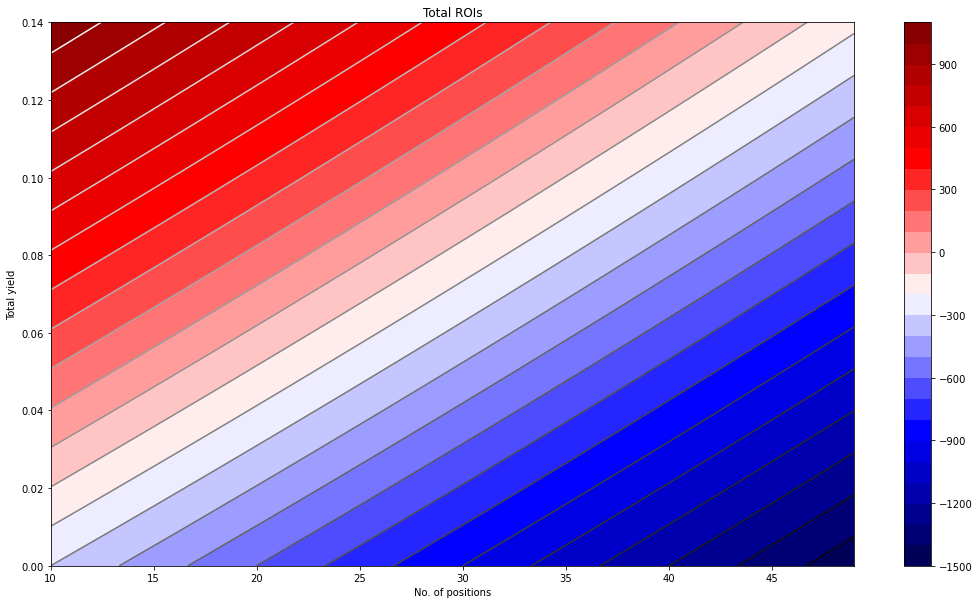

In [182]:
fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(ns, total_yields, total_rois, 
                levels=25, cmap='gray',
                )
cs = ax.contourf(ns, total_yields, total_rois, 
                 levels=25, cmap='seismic',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('No. of positions')
ax.set_ylabel('Total yield')
ax.set_title('Total ROIs')